### Data Science Jobs in USA

In [64]:
%load_ext blackcellmagic

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
import json
import time


# Import API key
from api_keys import api_key_usajobs

# Output File (CSV)
output_data_file = "jobs.csv"

In [95]:
url = "https://data.usajobs.gov/api/codelist/occupationalseries"
r = requests.get(url)
if r.status_code == 200:
    r_json = r.json()

    my_list = r_json["CodeList"][0]["ValidValue"]
    jobtitles = {}
    for d in my_list:
        for k, v in d.items():
            jobtitles[d["Value"]] = d["Code"]
else:
    print("Error")
col1 = []
col2 = []
for k, v in jobtitles.items():
    col1.append(k)
    col2.append(v)

d = {"Job titles": col1, "Code": col2}
df = pd.DataFrame(data=d)
df.to_csv(output_data_file)

col1 = []
col2 = []
print(df.sort_values(by=["Job titles"]))
for k, v in jobtitles.items():
    if ("Engineering" in k) or ("Data" in k) or ("Coding" in k) or ("Computer" in k) or ("Programming" in k):
        col1.append(k)
        col2.append(v)

d = {"Job titles": col1, "Code": col2}
df_selected = pd.DataFrame(data=d)


                          Job titles  Code
730                      Able Seaman  9924
731          Able Seaman-Maintenance  9925
139                       Accounting  0510
142            Accounting Technician  0525
350                Actuarial Science  1510
..                               ...   ...
44             Workforce Development  0142
43   Workforce Research And Analysis  0140
275              Writing And Editing  1082
796               Yeoman-Storekeeper  9998
109                          Zoology  0410

[798 rows x 2 columns]


In [96]:
col3 = []

print("Beginning data retreival")
for code in df_selected["Code"]:
    page = 0
    out_job = get_jobs_json(code, api_key_usajobs, 0)
    
    number_of_pages = out_job["SearchResult"]["UserArea"]["NumberOfPages"]
    number_of_jobs = out_job["SearchResult"]["SearchResultCountAll"]
    col3.append(number_of_jobs)
col = pd.DataFrame(data = {"No.ofJobs":col3})
df_selected = df_selected.join(col)



Beginning data retreival


In [97]:
df_new = df_selected.sort_values(by="No.ofJobs", ascending = False)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text major ticklabel objects>)

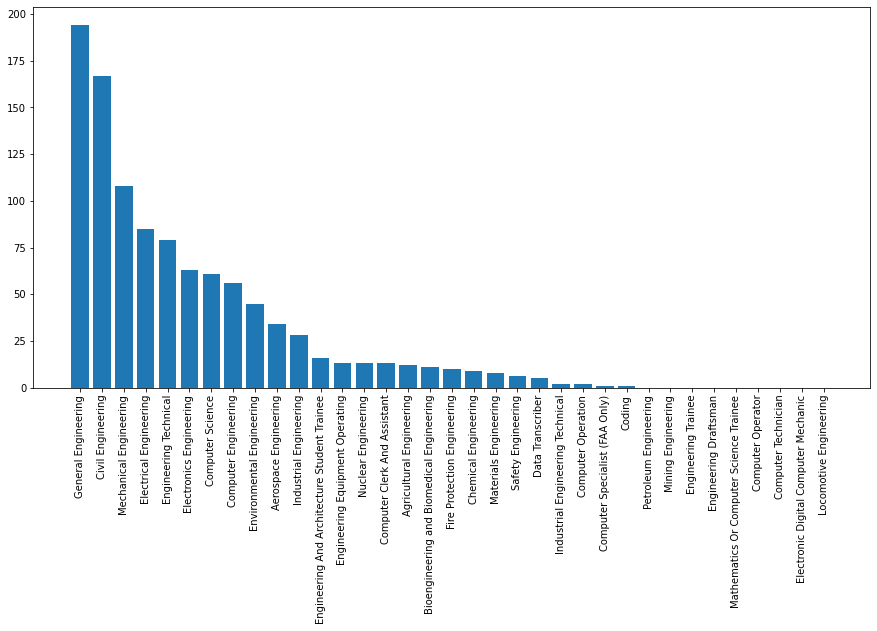

In [98]:
figsize_width = 15
figsize_height = 7
plt.figure(figsize = (figsize_width, figsize_height))
plt.bar(df_new["Job titles"],df_new["No.ofJobs"])
plt.xticks(rotation=90)

In [66]:
def get_jobs_json(JobCategoryCode, api_key, page):
    url = "https://data.usajobs.gov/api/search?ResultsPerPage=10"
    host = "data.usajobs.gov"

    r = requests.get(
        url,
        headers={
            "Host": host,
            "User-Agent": "pratima.gokhale@gmail.com",
            "Authorization-Key": api_key,
        },
        params={"Page": page, "JobCategoryCode": JobCategoryCode},
    )

    if r.status_code == 200:
        r_json = r.json()
        return r_json
    else:
        return None

In [101]:
cleaned_out_job ={}
def clean_jobs(out_job):
    number_of_jobs = out_job["SearchResult"]["SearchResultCount"]
    #print(number_of_jobs)
    my_list = out_job["SearchResult"]["SearchResultItems"]
    for e in my_list:
        for k, v in e.items():
            if k == "MatchedObjectDescriptor":
                print(len(v["PositionLocation"]))
                               
                for city in range(0, len(v["PositionLocation"])):
                    
                    cleaned_out_job["Job title"] = v["PositionTitle"],
                    cleaned_out_job["Location"] = v["PositionLocationDisplay"],
                    cleaned_out_job["Qualification Summary"] = v["QualificationSummary"]
                    cleaned_out_job["Max Salary"] = v["PositionRemuneration"][0]["MaximumRange"]
                    cleaned_out_job["Min Salary"] = v["PositionRemuneration"][0]["MinimumRange"]
                    cleaned_out_job["Job Code"] = v["JobCategory"][0]["Code"]
                    cleaned_out_job["OrganizationName"] = v["OrganizationName"]
                    cleaned_out_job["City Name"] = v["PositionLocation"][city]["CityName"]
                    cleaned_out_job["Country Name"] = v["PositionLocation"][city]["CountryCode"]
                    #cleaned_out_job["UserArea"]["Details"]["Education"]
                    #cleaned_out_job["UserArea"]["Details"]["Requirements"]
                    #cleaned_out_job["UserArea"]["Details"]["KeyRequirements"]
                    #if (v["PositionLocation"][city]["CountrySubDivisionCode"]):
                     #   cleaned_out_job["State Name"] = v["PositionLocation"][city]["CountrySubDivisionCode"]
                    #else:
                     #   cleaned_out_job["State Name"] = np.nan
                
                    

                    
                
    return(pd.DataFrame(cleaned_out_job))

In [68]:
# out_job = []
col3 = []
#df_temp = pd.DataFrame([], [], columns=["Job title", "Location"])
print("Beginning data retreival")
for code in df_selected["Code"]:
    page = 0
    out_job = get_jobs_json(code, api_key_usajobs, 0)
    
    number_of_pages = out_job["SearchResult"]["UserArea"]["NumberOfPages"]
    number_of_jobs = out_job["SearchResult"]["SearchResultCountAll"]
    col3.append(number_of_jobs)
        
    
    print("no.of.pages {} for job code {} No. of jobs {}".format(number_of_pages, code,number_of_jobs ))
  
    
    for page in range(0, int(number_of_pages)):
        out_job = get_jobs_json(code, api_key_usajobs, page)
        time.sleep(20)
        if out_job:
            df_temp = df_temp.append(clean_jobs(out_job), ignore_index=True)
        else:
            print("job not found: skipping data")

df_temp.head()
#col = pd.DataFrame(data = {"No.ofJobs":col3})
#df_selected = df_selected.join(col)
df_temp.to_csv("job_list.csv")

Beginning data retreival
no.of.pages 1 for job code 0332 No. of jobs 2
7
2
no.of.pages 1 for job code 0334 No. of jobs 1
673
no.of.pages 2 for job code 0335 No. of jobs 13
32
21
32
1
1
1
1
1
1
1
32
21
32
1
1
1
1
1
1
1
no.of.pages 1 for job code 0356 No. of jobs 5
1
1
1
1
1
no.of.pages 1 for job code 0357 No. of jobs 1
1
no.of.pages 20 for job code 0801 No. of jobs 194
1
103
42
673
673
673
12
1
673
30
1
103
42
673
673
673
12
1
673
30
1
1
1
1
1
1
1
6
56
3
9
35
1
1
1
6
4
1
1
1
201
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
4
1
101
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
no.of.pages 8 for job code 0802 No. of jobs 79
2
20
1
673
1
3
1
34
1
5
2
20
1
673
1
3
1
34
1
5
1
1
1
1
201
1
1
1
1
1
1
1
4
1
3
3
1
2
3
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1


In [75]:
import re
def extract_tech_count(s, tech):
    result_count = re.findall(tech, s)

    if result_count:
        return len(result_count)
    else:
        return np.nan

In [76]:
df_edu = pd.DataFrame(columns={"Edu", "No.ofJobs"})
education_list = [["masters","Masters","MS", "Master's"], ["bachelor's", "Bachelors", "bachelors", "Bachelor's"], ["Phd", "PhD", "Ph.D"]]
sample = df_temp["Qualification Summary"]
for e in education_list:
    count = 0
    for edu in e:
  
        job_edu = sample.apply(lambda s: extract_tech_count(s, edu))

        for i in range(0, len(job_edu)):
            if(pd.notna(job_edu[i])):
                count += 1
            else:
                continue
    edu_list_count = pd.DataFrame({"Edu":[edu], "No.ofJobs":[count]})
    df_edu = df_edu.append(edu_list_count)

df_edu.set_index("Edu")

,No.ofJobs
Edu,
Master's,31
Bachelor's,144
Ph.D,20


In [109]:
df_tech = pd.DataFrame(columns={"Tech", "No.ofJobs"})
tech_list = ["civil engineer","computer engineer","electrical engineer","biomedical", "software", "mechanical engineer", "mathematics", "electronic", "aerospace", "chemical engineer"]

sample = df_temp["Qualification Summary"]
sample = sample.str.lower()
for tech in tech_list:
    count =0
    job_tech = sample.apply(lambda s: extract_tech_count(s, tech))
  
    for i in range(0, len(job_tech)):
   
        if(pd.notna(job_tech[i])):
            count += 1
        else:
            continue
    tech_list_count = pd.DataFrame({"Tech":[tech], "No.ofJobs":[count]})
    df_tech = df_tech.append(tech_list_count)

df_tech.set_index("Tech")

,No.ofJobs
Tech,
civil engineer,35
computer engineer,14
electrical engineer,23
biomedical,4
software,22
mechanical engineer,39
mathematics,85
electronic,89
aerospace,10


In [107]:
def extract_years_only(s):
    results = re.findall(r"([0-9]*)\+?.[yY]ear.*", s)
    if results and results[0]:
        return int(results[0])
    else:
        return np.nan

print(len(df_temp["Qualification Summary"]))
years = df_temp["Qualification Summary"].apply(lambda s: extract_years_only(s))
print((years))
df_years=pd.DataFrame(years.value_counts().sort_index())
df_years=df_years.rename(columns={"Qualification Summary":"No. of jobs"})
df_years.index.name ="Required No.of Years of Experience"
df_years

200
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
195    NaN
196    NaN
197    NaN
198    NaN
199    NaN
Name: Qualification Summary, Length: 200, dtype: float64


,No. of jobs
Required No.of Years of Experience,
1.0,13
8.0,1
18.0,3


In [141]:
df_state = df_temp["City Name"].str.split() 
print(type(df_state))
df_state[0][-1]
df_state = pd.Series([df_state[i][-1] for i in range(0,len(df_state))])
df_state

<class 'pandas.core.series.Series'>


0              Utah
1              Utah
2              Utah
3              Utah
4              Utah
           ...     
195        Virginia
196        Virginia
197    Pennsylvania
198          Nevada
199          Nevada
Length: 200, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 <a list of 37 Text major ticklabel objects>)

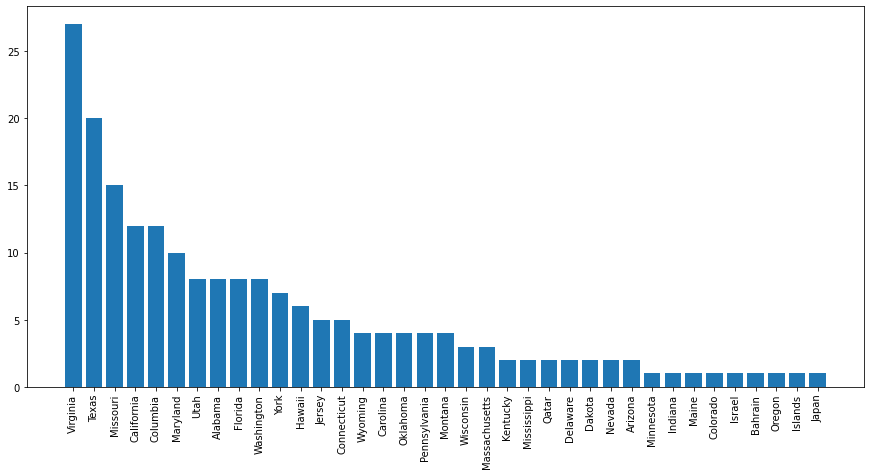

In [143]:

figsize_width = 15
figsize_height = 7
plt.figure(figsize = (figsize_width, figsize_height))
df_state = df_temp["City Name"].str.split() 
df_state = pd.Series([df_state[i][-1] for i in range(0,len(df_state))])
plt.bar(df_state.value_counts().index, df_state.value_counts())
plt.xticks(rotation=90)

In [157]:

color = ['red' if val > 0 else 'green' for val in change_in_tumor_volumn]
df_temp_salary = df_temp
df_temp_sal_float = df_temp_salary["Max Salary"].values.astype(float).tolist()
df_temp_salary["Max Salary"] = pd.Series([int(val)*2080 if (i(val) < 100 ) for val in df_temp_sal_float])

SyntaxError: invalid syntax (<ipython-input-157-b07ed3f69587>, line 4)

In [159]:
df_temp_sal_float = df_temp_salary["Max Salary"].values.astype(float).tolist()
for val in df_temp_sal_float

[28.72,
 28.72,
 28.72,
 28.72,
 28.72,
 97825.0,
 74762.0,
 19.05,
 74759.0,
 176900.0,
 176900.0,
 136271.0,
 99741.0,
 68777.0,
 68777.0,
 100008.0,
 125651.0,
 157709.0,
 83710.0,
 83710.0,
 107542.0,
 119227.0,
 59675.0,
 141573.0,
 141573.0,
 154957.0,
 170800.0,
 197300.0,
 197300.0,
 111389.0,
 111389.0,
 115552.0,
 115552.0,
 140146.0,
 101204.0,
 93161.0,
 133465.0,
 56619.0,
 101204.0,
 40765.0,
 115552.0,
 115552.0,
 24.25,
 28.72,
 97825.0,
 74762.0,
 19.05,
 74759.0,
 176900.0,
 176900.0,
 136271.0,
 99741.0,
 68777.0,
 68777.0,
 100008.0,
 125651.0,
 157709.0,
 83710.0,
 83710.0,
 107542.0,
 119227.0,
 59675.0,
 141573.0,
 141573.0,
 154957.0,
 170800.0,
 197300.0,
 197300.0,
 111389.0,
 111389.0,
 115552.0,
 115552.0,
 140146.0,
 101204.0,
 93161.0,
 133465.0,
 56619.0,
 101204.0,
 40765.0,
 115552.0,
 115552.0,
 24.25,
 28.72,
 97825.0,
 56222.0,
 56222.0,
 19.05,
 74759.0,
 139916.0,
 139916.0,
 69951.0,
 110224.0,
 90290.0,
 176900.0,
 177800.0,
 133465.0,
 115313.0,